In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import vizlib
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import lasagne
import nolearn.lasagne
from lasagne.layers import *
import theano
import theano.tensor as T
from sklearn.metrics import confusion_matrix
import nolearn.lasagne.visualize

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12.0, 8.0)

Using gpu device 0: Quadro K1000M (CNMeM is disabled, CuDNN not available)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


Couldn't import dot_parser, loading of dot files will not be possible.


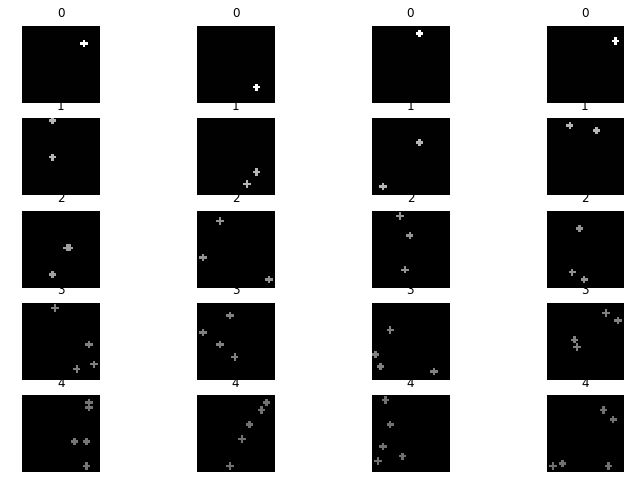

In [2]:
ds = vizlib.data.counting_2d(size=(32,32), n_examples=10000, min_spots=1, max_spots=5, seed=42).show_sample()

In [14]:
# In local-counting it turned out that we were unable to learn the 'counting' dataset sufficiently well enough
# to interpret the visualizations.
#
# In this attempt we will use a different network architecture (one that uses pooling),
# to reduce the dimensionality.

il = InputLayer((None, 1, 32, 32))
cl = Conv2DLayer(il, num_filters=1, filter_size=(3,3), pad='same')
pl = Pool2DLayer(cl, pool_size=2)
#cl2 = Conv2DLayer(pl, num_filters=1, filter_size=(3,3))
#pl2 = Pool2DLayer(cl2, pool_size=2)
dl = DenseLayer(pl, num_units=5, nonlinearity=lasagne.nonlinearities.softmax)

nn = nolearn.lasagne.NeuralNet(dl, update_learning_rate=1e-2, update_momentum=0.9, verbose=1)

In [15]:
nn.fit(ds.X, ds.y)

# Neural Network with 1295 learnable parameters

## Layer information

  #    name  output_shapes    nonlinearity    conv_shapes
---  ------  ---------------  --------------  -------------
  0          1x32x32
             1x32x32          rectify         3x3|P=sxaxmxe
             1x16x16
             5                softmax

  epoch    train loss    valid loss    train/val    train acc    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----------  -----
      1       1.45162       1.19324      1.21654      0.33797      0.39052  1.44s
      2       1.08896       1.00038      1.08855      0.43081      0.54041  1.36s
      3       0.94934       0.89820      1.05695      0.58836      0.61413  1.28s
      4       0.86367       0.82646      1.04502      0.64577      0.62514  1.37s
      5       0.80152       0.77253      1.03754      0.66563      0.64012  1.32s
      6       0.75391       0.73043      1.03215      0.68636      0.67399  1.29s
      7       0.

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f272deb5510>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f272deb5490>,
     custom_score=None,
     layers=[<lasagne.layers.dense.DenseLayer object at 0x7f2706de8510>],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x7f272deb82a8>,
     objective_loss_function=<function categorical_crossentropy at 0x7f272eb692a8>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7f2706f20ab8>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7f2706f20ea8>],
     regression=False,
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x7f272deb5550>,
     update=<function nesterov_momentum at 0x7f272eb69b90>,
     update_learning_rate=0.01, update_momentum=0.9,
     use_label_encoder=False, verbose=1,
     y_tens

In [17]:
confusion_matrix(ds.y, nn.predict(ds.X)), (ds.y == nn.predict(ds.X)).mean()
# The errors made look very much the same as the errors made by the non-pooling network.
# Let's try adding some more layers on top.

(array([[   0, 1896,    0,    0,    0],
        [   0, 2009,    0,    0,    0],
        [   0,   78, 1974,    0,    0],
        [   0,    0,    2, 2003,    0],
        [   0,    0,    0,    5, 2033]]), 0.80189999999999995)

In [21]:
# In local-counting it turned out that we were unable to learn the 'counting' dataset sufficiently well enough
# to interpret the visualizations.
#
# In this attempt we will use a different network architecture (one that uses pooling),
# to reduce the dimensionality.

il = InputLayer((None, 1, 32, 32))
cl = Conv2DLayer(il, num_filters=1, filter_size=(3,3), pad='same')
pl = Pool2DLayer(cl, pool_size=2)
cl2 = Conv2DLayer(pl, num_filters=1, filter_size=(3,3))
pl2 = Pool2DLayer(cl2, pool_size=2)
dl = DenseLayer(pl2, num_units=5, nonlinearity=lasagne.nonlinearities.softmax)

nn = nolearn.lasagne.NeuralNet(dl, update_learning_rate=1e-3, update_momentum=0.9, verbose=1)
nn.fit(ds.X, ds.y, epochs=400)

# Neural Network with 270 learnable parameters

## Layer information

  #    name  output_shapes    nonlinearity    conv_shapes
---  ------  ---------------  --------------  -------------
  0          1x32x32
             1x32x32          rectify         3x3|P=sxaxmxe
             1x16x16
             1x14x14          rectify         3x3
             1x7x7
             5                softmax

  epoch    train loss    valid loss    train/val    train acc    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----------  -----
      1       1.63238       1.60799      1.01516      0.18709      0.24284  1.84s
      2       1.61013       1.60755      1.00160      0.22777      0.24745  1.84s
      3       1.60972       1.60738      1.00146      0.23063      0.24940  1.84s
      4       1.60952       1.60722      1.00143      0.23174      0.24355  1.84s
      5       1.60936       1.60707      1.00142      0.22914      0.23595  1.84s
      6       1.60921       1.

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f272deb5510>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f272deb5490>,
     custom_score=None,
     layers=[<lasagne.layers.dense.DenseLayer object at 0x7f2702e10150>],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x7f272deb82a8>,
     objective_loss_function=<function categorical_crossentropy at 0x7f272eb692a8>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7f27039d2050>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7f27039d21b8>],
     regression=False,
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x7f272deb5550>,
     update=<function nesterov_momentum at 0x7f272eb69b90>,
     update_learning_rate=0.001, update_momentum=0.9,
     use_label_encoder=False, verbose=1,
     y_ten

In [22]:
confusion_matrix(ds.y, nn.predict(ds.X)), (ds.y == nn.predict(ds.X)).mean()
# The errors made look very much the same as the errors made by the non-pooling network.
# Let's try adding some more layers on top.

(array([[1445,  313,   24,    0,  114],
        [ 629, 1235,  128,    1,   16],
        [   0,   36, 1967,   28,   21],
        [   0,    0,   58,   60, 1887],
        [   0,    3,   65,   37, 1933]]), 0.66400000000000003)

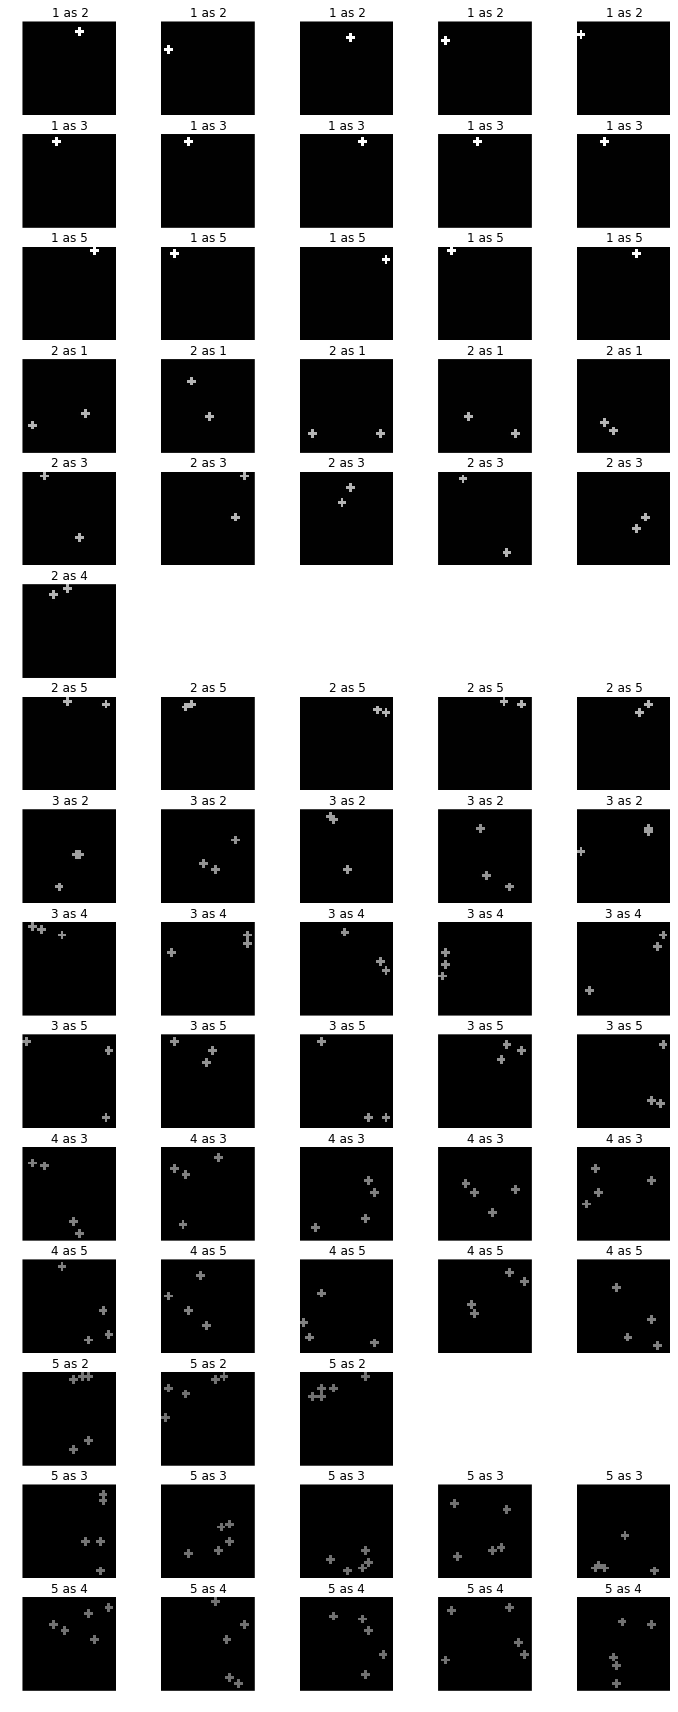

In [30]:
plt.figure(figsize=(12, 40))
ypred = nn.predict(ds.X)
vmin, vmax = ds.X.min(), ds.X.max()
plot_idx = 1
for i in range(5):
    for j in range(5):
        if i == j:
            continue
        incorrect_i_as_j = (ds.y == i) & (ypred == j)
        xs = ds.X[incorrect_i_as_j]
        ytrues = ds.y[incorrect_i_as_j]
        ypreds = ypred[incorrect_i_as_j]
        
        for k in range(min(5, len(xs))):
            plt.subplot(5 * 4, 5, plot_idx + k)
            plt.title('{} as {}'.format(i + 1, j + 1))
            plt.imshow(xs[k].squeeze(), vmax=vmax, vmin=vmin)
            plt.axis('off')
        if len(xs) > 0:    
            plot_idx += 5

In [11]:
# I found that using 2 pooling layers discards too much information.
# I would think that it should be easy to hardcode the information that we need.
W = np.array([[0,1,0],
              [1,1,1],
              [0,1,0]], dtype=theano.config.floatX).reshape(1,1,3,3)
# Now the filter will activate a lot if it completely overlaps.
# How much? We need to know this to determine a threshold.
# The filter has 5 ones.

il = InputLayer((None,1,32,32))
cl = Conv2DLayer(il, num_filters=1, filter_size=(3, 3), W=W, pad='same')
dl = DenseLayer(
    cl,
    num_units=len(set(list(ds.y))),
    W=np.ones((32 * 32, 5)),
    b=np.array([-ds.X[ds.y == i].max() * 0.9 * 5 * i for i in set(list(ds.y))]),
    nonlinearity=lasagne.nonlinearities.softmax,
)
nn = nolearn.lasagne.NeuralNet(dl, update_learning_rate=1e-2, update_momentum=0.9, verbose=1)
nn.fit(ds.X, ds.y)

# Neural Network with 5135 learnable parameters

## Layer information

  #    name  output_shapes    nonlinearity    conv_shapes
---  ------  ---------------  --------------  -------------
  0          1x32x32
             1x32x32          rectify         3x3|P=sxaxmxe
             5                softmax

  epoch    train loss    valid loss    train/val    train acc    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----------  -----
      1       7.41158       0.97996      7.56315      0.53269      0.69567  1.40s
      2       0.59863       0.49345      1.21316      0.77957      0.80474  1.40s
      3       0.38526       0.43111      0.89366      0.83898      0.82982  1.37s
      4       0.34546       0.41553      0.83138      0.85634      0.83708  1.43s
      5       0.32985       0.40862      0.80722      0.86405      0.84148  1.46s


NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fa57f750e90>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fa57f750e10>,
     custom_score=None,
     layers=[<lasagne.layers.dense.DenseLayer object at 0x7fa55c1cf190>],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x7fa57f75e398>,
     objective_loss_function=<function categorical_crossentropy at 0x7fa5844ed8c0>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7fa55c23e098>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7fa55c2d2f38>],
     regression=False,
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x7fa57f750ed0>,
     update=<function nesterov_momentum at 0x7fa5844f2230>,
     update_learning_rate=0.01, update_momentum=0.9,
     use_label_encoder=False, verbose=1,
     y_tens

In [12]:
y_true = ds.y
y_pred = nn.predict(ds.X)
confusion_matrix(y_true, y_pred)

array([[1896,    0,    0,    0,    0],
       [   5, 2001,    3,    0,    0],
       [   0,   11, 1696,  345,    0],
       [   0,    0,  206, 1530,  269],
       [   0,    0,    0,  409, 1629]])

In [39]:
# I found that using 2 pooling layers discards too much information.
# I would think that it should be easy to hardcode the information that we need.
W = np.array([[0,1,0],
              [1,1,1],
              [0,1,0]], dtype=theano.config.floatX).reshape(1,1,3,3)
# Now the filter will activate a lot if it completely overlaps.
# How much? We need to know this to determine a threshold.
# The filter has 5 ones.

il = InputLayer((None,1,32,32))
cl = Conv2DLayer(
    il, num_filters=1, filter_size=(3, 3), W=W, pad='same',
    b=np.array([-3*ds.X.max()]),
    nonlinearity=lasagne.nonlinearities.sigmoid,
)
dl = DenseLayer(
    cl,
    num_units=len(set(list(ds.y))),
    W=np.ones((32 * 32, 5)),
    b=np.array([-ds.X[ds.y == i].max() * 0.1 for i in set(list(ds.y))]),
    nonlinearity=lasagne.nonlinearities.softmax,
)
nn = nolearn.lasagne.NeuralNet(dl, update_learning_rate=1e-2, update_momentum=0.9, verbose=1)
nn.initialize()

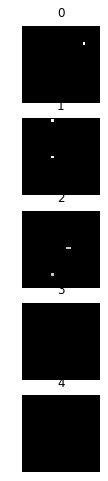

In [41]:
d = ds.one_of_class()
f = theano.function([il.input_var], lasagne.layers.get_output(cl))
a = f(d.X)
vizlib.data.DataSet(a, d.y).show_sample();

In [37]:
a[1].sum()

0.002328226050605771